<a href="https://colab.research.google.com/github/caioxf96/Meus-projetos---an-lise-de-dados/blob/main/Primeiro_projeto_de_Analise_de_Dados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio:

Você trabalha em uma grande empresa de Cartão de Crédito e o diretor da empresa percebeu que o número de clientes que cancelam seus cartões tem aumentado significativamente, causando prejuízos enormes para a empresa

O que fazer para evitar isso? Como saber as pessoas que têm maior tendência a cancelar o cartão?

# O que temos:

Temos 1 base de dados com informações dos clientes, tanto clientes atuais quanto clientes que cancelaram o cartão

Download da Base de Dados: Botão na página

Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

# O que fazer?

- Passo 1: Importar a base de dados
- Passo 2: Visualizar e tratar esta base de dados
- Passo 3: "Dar uma olhada na base de dados" e confirmar a real situação
- Passo 4: Construir uma análise para identificar os motivos do cancelamento
- Passo 5: Dar o parecer final

# Importando a tabela

In [ ]:
import pandas as pd
tabela = pd.read_csv("/content/drive/MyDrive/Mini Curso - Python/Cópia de ClientesBanco.csv", encoding="latin1")
tabela = tabela.drop("CLIENTNUM", axis=1)
display(tabela)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.000,1144,42,1625.000,0.061
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.000,1291,33,3714.000,0.105
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.000,1887,20,2333.000,0.000
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.000,1171,20,2333.000,0.760
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.000,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cliente,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Neste momento estou tratando valores que estiverem vazios e mostrando um resumo das colunas

In [ ]:
tabela = tabela.dropna()
display(tabela.info())
display(tabela.describe().round(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10126 non-null  object 
 1   Idade                          10126 non-null  int64  
 2   Sexo                           10126 non-null  object 
 3   Dependentes                    10126 non-null  int64  
 4   Educação                       10126 non-null  object 
 5   Estado Civil                   10126 non-null  object 
 6   Faixa Salarial Anual           10126 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10126 non-null  int64  
 9   Produtos Contratados           10126 non-null  int64  
 10  Inatividade 12m                10126 non-null  int64  
 11  Contatos 12m                   10126 non-null  int64  
 12  Limite                         10126 non-null 

None

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0
mean,46.3,2.3,35.9,3.8,2.3,2.5,8632.0,1162.8,7469.2,108.7,4404.4,64.9,66.6,0.3
std,8.0,1.3,8.0,1.6,1.0,1.1,9089.2,815.0,9091.1,353.9,3397.2,23.5,284.0,0.3
min,26.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0
25%,41.0,1.0,31.0,3.0,2.0,2.0,2555.0,358.0,1324.2,0.6,2156.0,45.0,0.6,0.0
50%,46.0,2.0,36.0,4.0,2.0,2.0,4549.0,1276.0,3473.0,0.7,3899.5,67.0,0.7,0.2
75%,52.0,3.0,40.0,5.0,3.0,3.0,11067.8,1784.0,9860.0,0.9,4741.0,81.0,0.8,0.5
max,73.0,5.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3397.0,18484.0,139.0,3714.0,1.0


# Avaliando a divisão de Clientes x Cancelados obtemos:


In [ ]:
qtde_categoria = tabela["Categoria"].value_counts()
display(qtde_categoria)

qtde_categoria_perc = tabela["Categoria"].value_counts(normalize=True)
display(qtde_categoria_perc)

Cliente      8499
Cancelado    1627
Name: Categoria, dtype: int64

Cliente      0.839325
Cancelado    0.160675
Name: Categoria, dtype: float64

# Como podemos observar, temos aproximadamente 84% de clientes ativos e 16% de cancelados. Conseguir diminuir a porcentagem de cancelados seria algo muito positivo/lucrativo para a empresa.

# Existem várias formas de encontrar os motivos do cancelamento

- Podemos analisar a comparação entre Clientes e Cancelados em cada uma das colunas da nossa base de dados, para ver se essa informação traz algum insight novo.

- Nem sempre iremos encontrar um único motivo ou entender exatamente o porquê deste motivo, mas através dos números iremos encontrar os caminhos para resolver este problema (mesmo que a gente não entenda).

- Fazendo um paralelo com o princípio de Pareto, as vezes 20% dos motivos são responsáveis por 80% dos cancelamentos. Os números indicarão os caminhos.

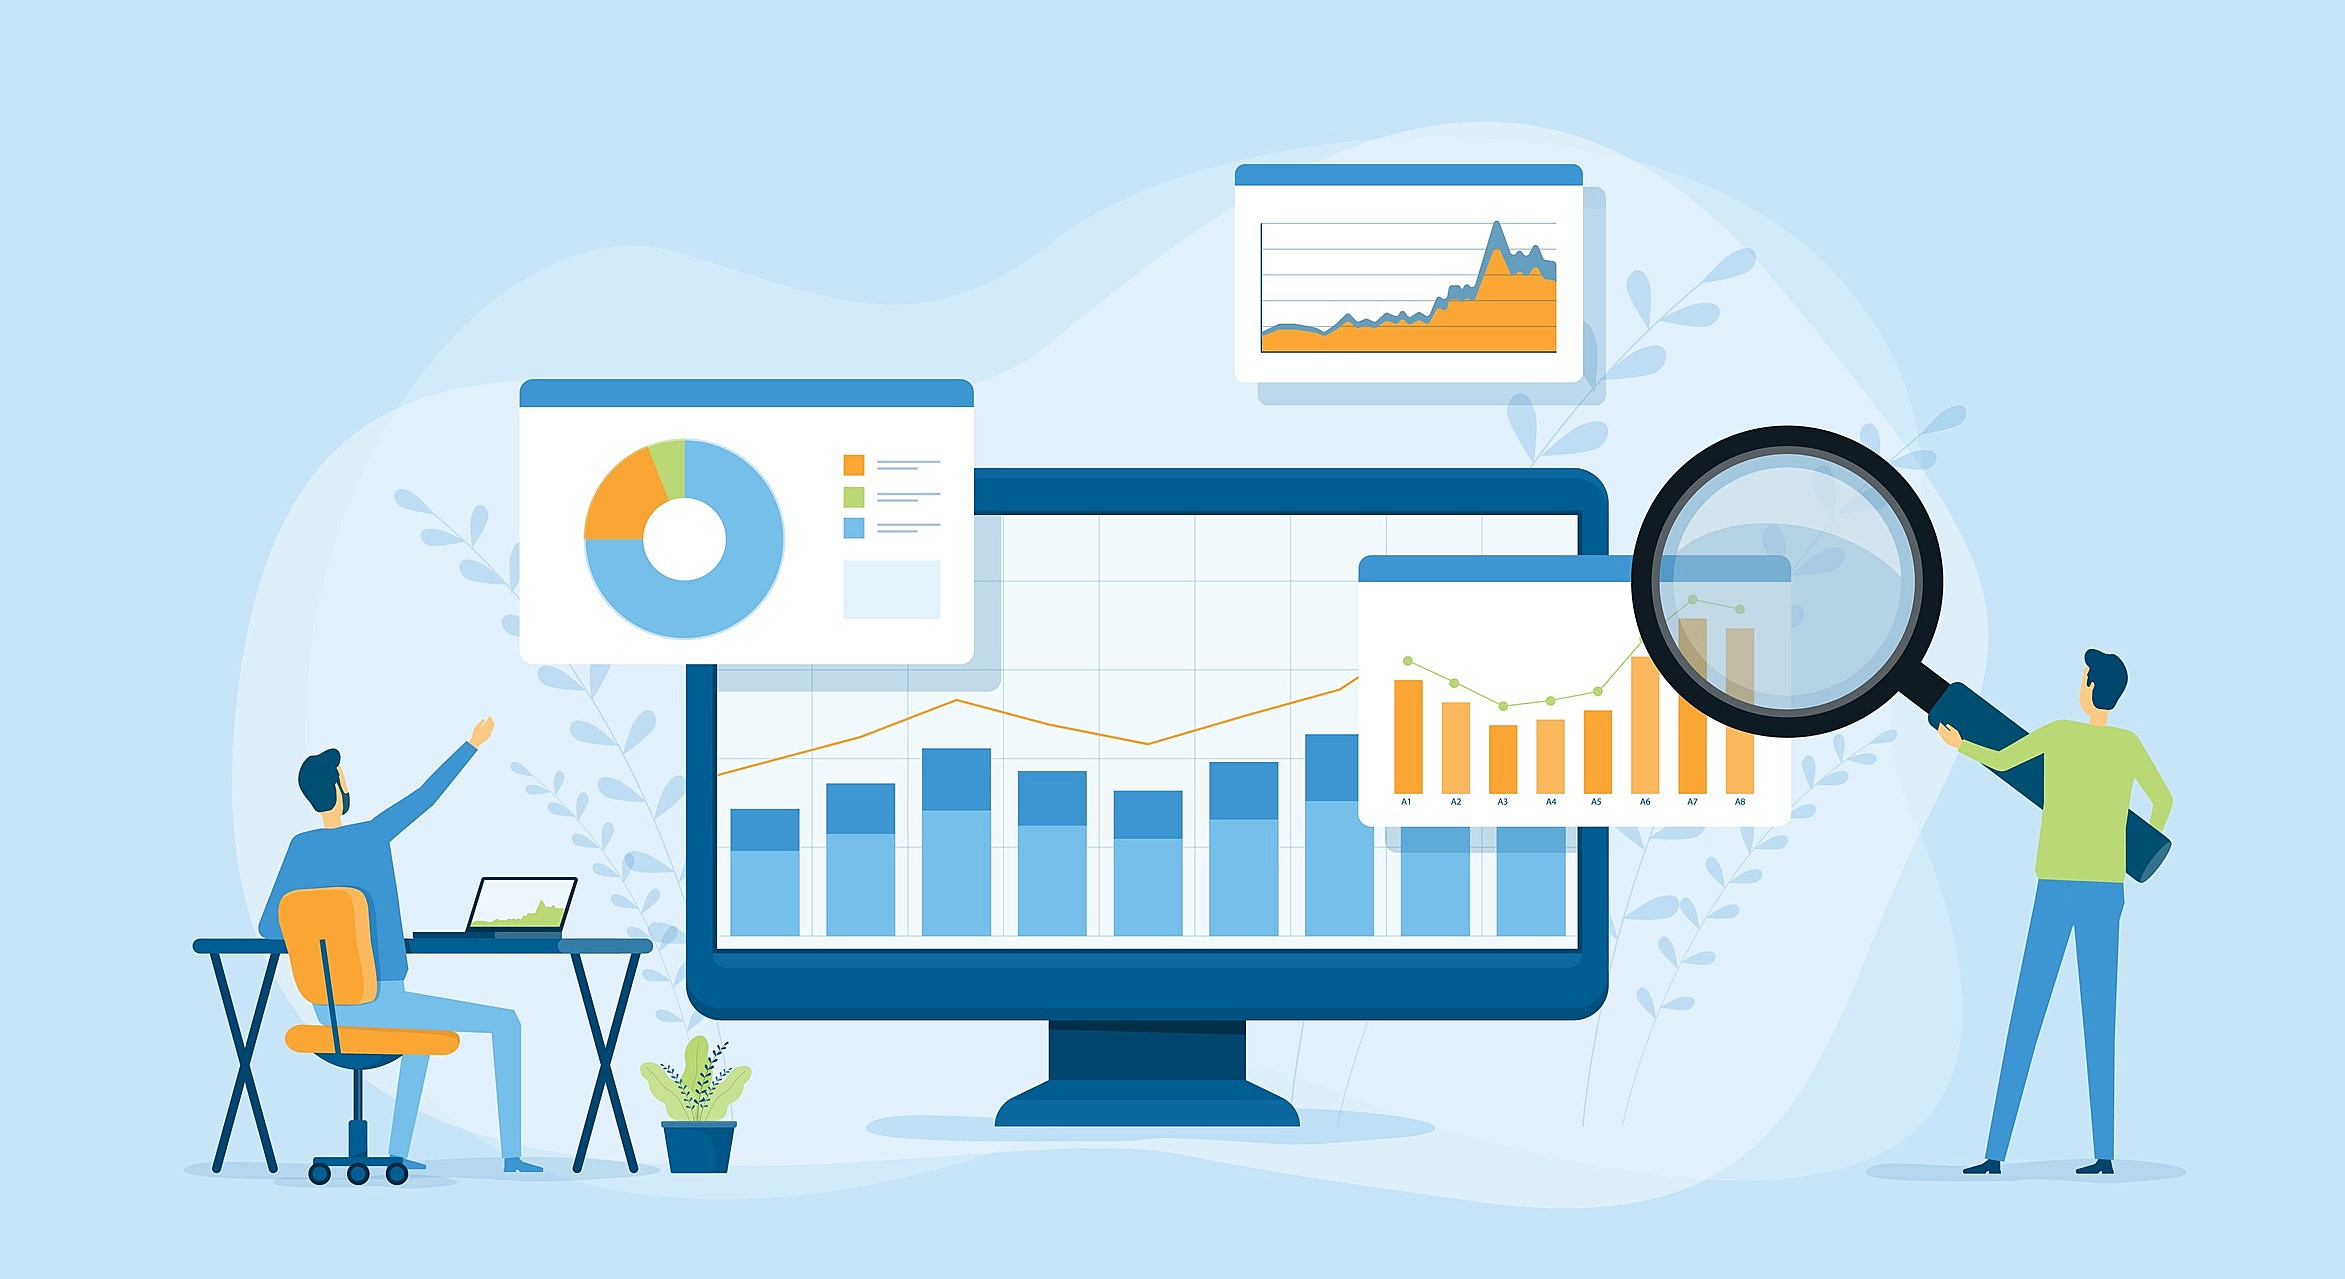

In [ ]:
import plotly.express as px

for coluna in tabela:
  grafico = px.histogram(tabela, x=coluna, color="Categoria")
  grafico.show()

# Devemos evitar análises "forçadas". Foco primeiro nos gráficos que "saltam" aos olhos.

Anotações

- Clientes na faixa de 40 e 55 anos tem maior tendência a cancelar cartões. (gráfico 2)

- Clientes com menos de 3 produtos cadastrados possuem maior tendência a cancelar cartões. (gráfico 8)

- A partir da 3a ligação de atendimento os clientes tem uma grande tendência de cancelar o serviço. (gráfico 12)

- Existe maior probabilidade de clientes com menos de 5K de limite cancelarem o cartão. (gráfico 13)

- Clientes que consomem menos de 600 reais do limite tem maior tendência de cancelar o cartão. (gráfico 14)

- Clientes na faixa de 2k a 3k gastos em transações possuem alta tendência a cancelamentos. Na faixa de 4K a 7K a probabilidade de cancelamento é muito pequena, assim como valores acima de 12K.(gráfico 17)

- Clientes que fazem de 30 a 55 transações tem altas chances de cancelarem o cartão. (gráfico 18)



# Soluções propostas:

- Focar nos clientes da categoria "blue" por representarem cerca de 90% do total de clientes da empresa.

- Dar uma atenção maior aos clientes que estão entre 40 e 55 anos, como promoções, aumento do limite do cartão ou aumento da quantidade de produtos do pacote;

- Colocar metas aos funcionários de vendas para persuadir o cliente a fazer planos com mais de 3 produtos;

- Conscientizar e treinar funcionários para resolver os problemas dos clientes em no máximo 3 ligações de reclamações, com um controle de ligações por cliente que emita um alerta vermelho após a 2 ligação;

- Aumentar o limite do cartão dos clientes que possuem limite abaixo de 5K;

- Estimular os clientes a usarem o limite do cartão dando maior flexibilidade no pagamento;

- Encontrar os clientes que gastam de 2k a 3k e persuadi-los a gastar acima dos 4k e os que estão a partir de 7k a gastar mais de 12k através de premiações ou bônus se eles baterem essas metas.



# De forma resumida, quanto mais o cliente usa o cartão e maiores forem os valores, MENOR a probabilidade de cancelamento.

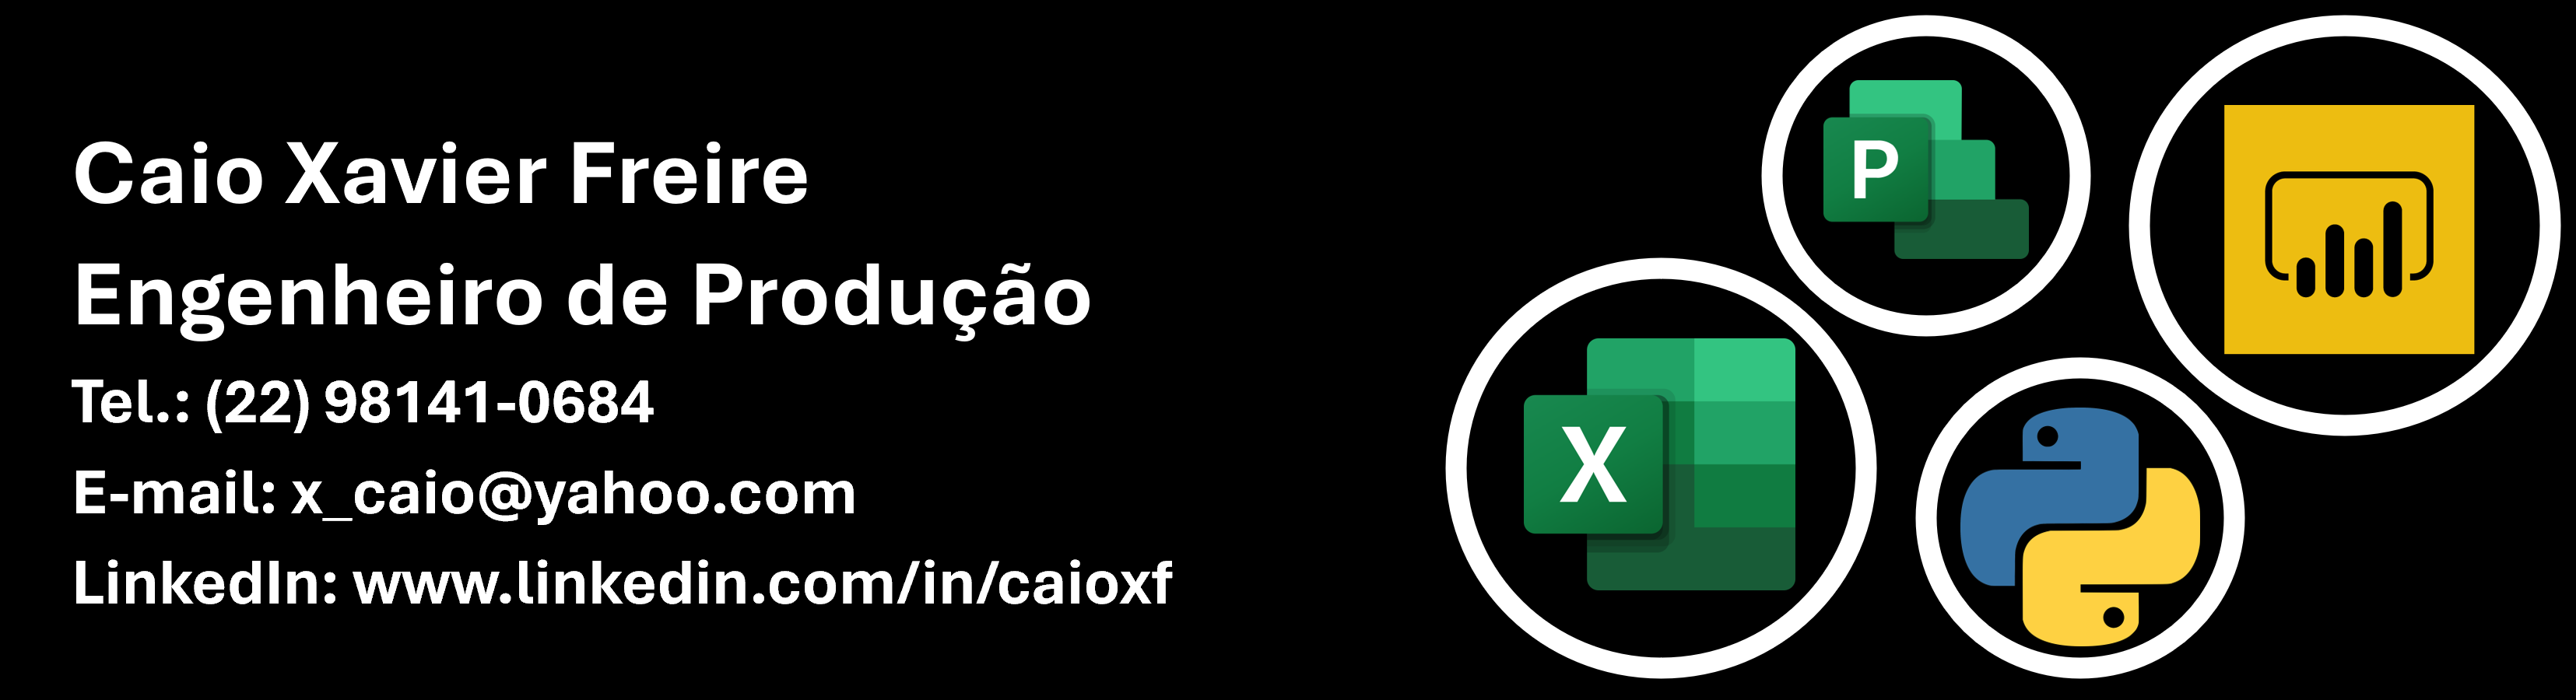